In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


### let us prepare data for weka

In [6]:
df = pd.DataFrame(pd.read_table('structure.txt'))
df = df[df['tcr_region'] == 'CDR3']

columns = ['mhc_type', 'tcr_v_allele', 'aa_tcr', 'aa_antigen', 'len_tcr', 'len_antigen', 'pos_tcr', 'pos_antigen', 'distance']
df = df[columns]
df.loc[df.tcr_v_allele.str.startswith('TRA'), 'tcr_v_allele'] = 'alpha'
df.loc[df.tcr_v_allele.str.startswith('TRB'), 'tcr_v_allele'] = 'beta'
df['pos_tcr'] = df['pos_tcr'] - map(np.floor, (df['len_tcr'] / 2))
df['pos_antigen'] = df['pos_antigen'] - map(np.floor, (df['len_antigen'] / 2))
df.distance = df.distance < 6
df.index = range(df.shape[0])
#df = df[(df['pos_tcr'] <= 4) & (df['pos_tcr'] >= -5) & (df['pos_antigen'] <= 4) & (df['pos_antigen'] >= -4)]

#df.to_csv('weka/class_via_distance/dist10/dist10.csv', index=False)

df.head()

,mhc_type,tcr_v_allele,aa_tcr,aa_antigen,len_tcr,len_antigen,pos_tcr,pos_antigen,distance
0,MHCI,alpha,C,L,13,9,-6,-4,False
1,MHCI,alpha,C,L,13,9,-6,-3,False
2,MHCI,alpha,C,F,13,9,-6,-2,False
3,MHCI,alpha,C,G,13,9,-6,-1,False
4,MHCI,alpha,C,Y,13,9,-6,0,False


### load miyazawa 1996 energy table

In [2]:
nrg_mat = pd.DataFrame(pd.read_table('miyazava_table.txt'))
nrg_mat.index = nrg_mat.columns
for i in range(nrg_mat.shape[0]):
    for j in range(i):
        nrg_mat.iloc[i, j] = nrg_mat.iloc[j, i]
nrg_mat.sort_index(0, inplace=True)
nrg_mat.sort_index(1, inplace=True)
nrg_mat.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,-2.72,-3.57,-1.70,-1.51,-4.81,-2.31,-2.41,-4.58,-1.31,-4.91,-3.94,-1.84,-2.03,-1.89,-1.83,-2.01,-2.32,-4.04,-3.82,-3.36
C,-3.57,-5.44,-2.41,-2.27,-5.80,-3.16,-3.60,-5.50,-1.95,-5.83,-4.99,-2.59,-3.07,-2.85,-2.57,-2.86,-3.11,-4.96,-4.95,-4.16
D,-1.70,-2.41,-1.21,-1.02,-3.48,-1.59,-2.32,-3.17,-1.68,-3.40,-2.57,-1.68,-1.33,-1.46,-2.29,-1.63,-1.80,-2.48,-2.84,-2.76
E,-1.51,-2.27,-1.02,-0.91,-3.56,-1.22,-2.15,-3.27,-1.80,-3.59,-2.89,-1.51,-1.26,-1.42,-2.27,-1.48,-1.74,-2.67,-2.99,-2.79
F,-4.81,-5.80,-3.48,-3.56,-7.26,-4.13,-4.77,-6.84,-3.36,-7.28,-6.56,-3.75,-4.25,-4.10,-3.98,-4.02,-4.28,-6.29,-6.16,-5.66


### here we calculate interaction energy of CDR3 with antigen using miyazava energy table

In [15]:
df1 = pd.DataFrame(pd.read_table('structure.txt'))
df1 = df1[df1['tcr_region'] == 'CDR3']

df1.loc[df1.tcr_v_allele.str.startswith('TRA'), 'tcr_v_allele'] = 'alpha'
df1.loc[df1.tcr_v_allele.str.startswith('TRB'), 'tcr_v_allele'] = 'beta'
df1['pos_tcr'] = df1['pos_tcr'] - map(np.floor, (df1['len_tcr'] / 2))
df1['pos_antigen'] = df1['pos_antigen'] - map(np.floor, (df1['len_antigen'] / 2))
df1.dropna(inplace=True)
df1.index = range(df1.shape[0])

df1.loc[:, 'recalc_energy'] = 0
for x in range(df1.shape[0]):
    df1.iloc[x, -1] = nrg_mat.loc[df1.iloc[x, -9], df1.iloc[x, -8]]

In [16]:
df1.head()

,pdb_id,species,mhc_type,chain_mhc_a,chain_mhc_b,antigen_seq,tcr_v_allele,tcr_region,aa_tcr,aa_antigen,len_tcr,len_antigen,pos_tcr,pos_antigen,distance,energy,recalc_energy
0,1ao7,HomoSapiens,MHCI,A,B,LLFGYPVYV,alpha,CDR3,C,L,13,9,-6,-4,17.826448,0,-5.83
1,1ao7,HomoSapiens,MHCI,A,B,LLFGYPVYV,alpha,CDR3,C,L,13,9,-6,-3,19.934641,0,-5.83
2,1ao7,HomoSapiens,MHCI,A,B,LLFGYPVYV,alpha,CDR3,C,F,13,9,-6,-2,20.313959,0,-5.80
3,1ao7,HomoSapiens,MHCI,A,B,LLFGYPVYV,alpha,CDR3,C,G,13,9,-6,-1,17.734846,0,-3.16
4,1ao7,HomoSapiens,MHCI,A,B,LLFGYPVYV,alpha,CDR3,C,Y,13,9,-6,0,13.125239,0,-4.16


In [65]:
a = pd.Series([1,2,3,4])
b = pd.Series([1,2,3,4])
a / b

0    1
1    1
2    1
3    1
dtype: float64

1

### now we plot energy distribution of our structures

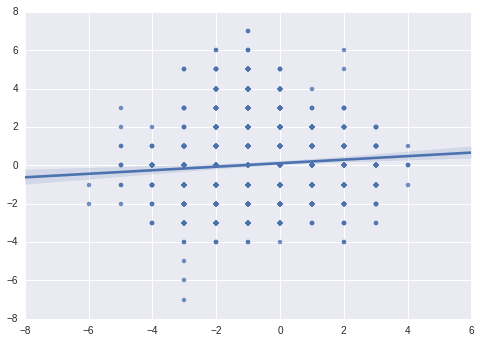

In [211]:
#sns.regplot(np.array(df1[df1['distance'] < 5]['pos_tcr']), -np.array(df1[df1['distance'] < 5]['pos_antigen']))

In [29]:
grouped = df1.groupby('pdb_id')

rec_energy_beta = []
for name, group in grouped:
    group = group[group['tcr_v_allele'] == 'beta']
    energy = []
    for tcr_center in range(-3, 4):    
        energy.append(sum(group.loc[(group['pos_tcr'] > tcr_center - 3) & \
                       (group['pos_tcr'] < tcr_center + 2) & \
                       ( (group['pos_tcr'] - tcr_center == (group['pos_antigen'] + np.sign(group['pos_antigen']))) | \
                         (group['pos_tcr'] - tcr_center == (group['pos_antigen'] - 0)) | \
                         (group['pos_tcr'] - tcr_center == (group['pos_antigen'] - 0)) ), 'recalc_energy']))
    rec_energy_beta.append(min(energy))
        
rec_energy_alpha = []
for name, group in grouped:
    group = group[group['tcr_v_allele'] == 'alpha']
    energy = []
    for ag_center in range(-2, 5):    
        energy.append(sum(group.loc[(group['pos_tcr'] > -3) & \
                       (group['pos_tcr'] < 3) & \
                       ( (group['pos_tcr'] == (group['pos_antigen'] - ag_center + np.sign(group['pos_antigen']))) | \
                         (group['pos_tcr'] == (group['pos_antigen'] - ag_center  - 0)) | \
                         (group['pos_tcr'] == (group['pos_antigen'] - ag_center  - 0)) ), 'recalc_energy']))
    rec_energy_alpha.append(min(energy))


#print len(rec_energy_alpha)  , len(rec_energy_beta)


rec_energy = pd.Series(rec_energy_alpha) + pd.Series(rec_energy_beta)
rec_energy.index = rec_energy;

rea_energy = [sum(group.loc[(group['distance'] < 100) & (group['tcr_v_allele'] == 'alpha') \
                            , 'energy']) for name, group in grouped]
rea_energy = pd.Series(rea_energy, index = grouped.groups.keys())

sns.regplot(rea_energy[rea_energy < 0], rec_energy[rea_energy < 0])
#sns.distplot(rea_energy - rec_energy, bins=50, kde=None)
np.corrcoef(rea_energy[rea_energy < 0], rec_energy[rea_energy < 0])

IndexingError: Unalignable boolean Series key provided

In [4]:
def process_single_line(line):
    id = line[-1]
    mhc_type = 'MHCI'
    tcr_v_allele = 'beta'
    cdr3 = line['#cdr3aa']
    antigen = line['antigen_seq']
    len_tcr = len(cdr3)
    len_antigen = len(antigen)
    empty = pd.DataFrame(columns=['tcr_id'] + list(df.columns), index=range(len_tcr*len_antigen))
    
    for i in range(len_tcr):
        for j in range(len_antigen):
            cur_id = i*len_antigen + j
            empty.ix[cur_id, 'aa_tcr'] = cdr3[i]
            empty.ix[cur_id, 'aa_antigen'] = antigen[j]
            empty.ix[cur_id, 'pos_tcr'] = i
            empty.ix[cur_id, 'pos_antigen'] = j
    empty['tcr_id'] = id
    empty['mhc_type'] = mhc_type
    empty['tcr_v_allele'] = tcr_v_allele
    empty['len_tcr'] = len_tcr
    empty['len_antigen'] = len_antigen
    empty['distance'] = np.nan
    empty['pos_tcr'] = empty['pos_tcr'] - map(np.floor, (empty['len_tcr'] / 2))
    empty['pos_antigen'] = empty['pos_antigen'] - map(np.floor, (empty['len_antigen'] / 2))
    return empty

In [5]:
vdjdb = pd.DataFrame(pd.read_table('vdjdb.txt'))
vdjdb = vdjdb[['#cdr3aa', 'chain', 'mhc', 'antigen_seq']]
vdjdb['id'] = vdjdb.index
vdjdb.dropna(inplace=True)
vdjdb = pd.concat([process_single_line(vdjdb.iloc[x, :]) for x in range(vdjdb.shape[0])])

NameError: global name 'df' is not defined

In [9]:
vdjdb['distance'] = True
vdjdb = vdjdb[vdjdb['aa_tcr'].str.isalpha() & vdjdb['aa_antigen'].str.isalpha()]
vdjdb.iloc[:, 0:].to_csv('vdjdb.csv', index=None)

In [14]:
df.head()

,mhc_type,tcr_v_allele,aa_tcr,aa_antigen,len_tcr,len_antigen,pos_tcr,pos_antigen,distance
9,MHCI,alpha,A,L,13,9,-5,-4,False
10,MHCI,alpha,A,L,13,9,-5,-3,False
11,MHCI,alpha,A,F,13,9,-5,-2,False
12,MHCI,alpha,A,G,13,9,-5,-1,False
13,MHCI,alpha,A,Y,13,9,-5,0,False


## After classification vdjdb table in weka we plot the distribution of interaction energy 

In [80]:
vdjdb_classified = pd.read_csv('weka/class_via_distance/dist10/with_aa_names_100_trees/vdjdb_dist10_with_aa_names_classified.csv')
vdjdb_classified.insert(0, 'pdb_id', list(vdjdb['tcr_id']))
# in case if amino acids columns were deleted {
#vdjdb_classified.insert(3, 'aa_antigen', list(vdjdb['aa_antigen']))
#vdjdb_classified.insert(3, 'aa_tcr', list(vdjdb['aa_tcr']))
# }
vdjdb_classified.loc[:, 'miyazava_energy'] = 0
for x in range(vdjdb_classified.shape[0]):
    vdjdb_classified.iloc[x, -1] = nrg_mat.loc[vdjdb_classified.iloc[x, -7], vdjdb_classified.iloc[x, -8]]
set(vdjdb_classified['aa_antigen'])
vdjdb_classified.head()

,pdb_id,mhc_type,tcr_v_allele,aa_tcr,aa_antigen,len_tcr,len_antigen,pos_tcr,pos_antigen,classification,miyazava_energy
0,0,MHCI,beta,C,N,15,9,-7,-4,False,-2.59
1,0,MHCI,beta,C,L,15,9,-7,-3,False,-5.83
2,0,MHCI,beta,C,V,15,9,-7,-2,False,-4.96
3,0,MHCI,beta,C,P,15,9,-7,-1,False,-3.07
4,0,MHCI,beta,C,M,15,9,-7,0,False,-4.99


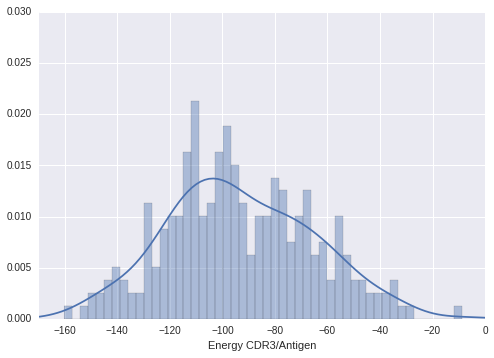

In [92]:
grouped_classified = vdjdb_classified.groupby('pdb_id')
rec_energy = [sum(grouped_classified.get_group(x).loc[(grouped_classified.get_group(x)['classification']) & \
              (grouped_classified.get_group(x)['tcr_v_allele'] == 'beta'), 'miyazava_energy']) \
              for x in grouped_classified.groups.keys()]
sns.distplot(rec_energy, bins=50, kde=True)
plt.axis([-170, 0, 0, 0.03])
plt.xlabel('Energy CDR3/Antigen')

## Now we mix the antigens in vdjdb table so that they were incorrectly matched with cdr3s, classify again and plot the distribution 

In [71]:
vdjdb_mixed = pd.DataFrame(pd.read_table('vdjdb.txt'))
vdjdb_mixed = vdjdb_mixed[['#cdr3aa', 'chain', 'mhc', 'antigen_seq']]

#print vdjdb_mixed.shape[0]
vdjdb_mixed.dropna(inplace=True)
vdjdb_mixed.drop_duplicates(subset=['#cdr3aa', 'antigen_seq'], keep='first', inplace=True)
vdjdb_mixed = vdjdb_mixed[vdjdb_mixed['#cdr3aa'].str.isalpha() & vdjdb_mixed['antigen_seq'].str.isalpha()]

grouped_mixed = vdjdb_mixed.groupby('antigen_seq')
antigens = grouped_mixed.groups.keys()
def change_antigen_column(i):
    table = grouped_mixed.get_group(antigens[i])
    table.loc[:, 'antigen_seq'] = antigens[i - 1]
    return table

vdjdb_mixed = pd.concat([change_antigen_column(i) for i in range(len(antigens))])
vdjdb_mixed.index = vdjdb_mixed['id'] = range(vdjdb_mixed.shape[0])

vdjdb_mixed = pd.concat([process_single_line(vdjdb_mixed.iloc[x, :]) for x in range(vdjdb_mixed.shape[0])])
#vdjdb_mixed = vdjdb_mixed[vdjdb_mixed['aa_tcr'].str.isalpha() & vdjdb_mixed['aa_antigen'].str.isalpha()]
vdjdb_mixed.head()
vdjdb_mixed['distance'] = True
vdjdb_mixed.iloc[:, 1:].to_csv('vdjdb_mixed.csv', index=None)


In [52]:
vdjdb_mixed.head()

,tcr_id,mhc_type,tcr_v_allele,aa_tcr,aa_antigen,len_tcr,len_antigen,pos_tcr,pos_antigen,distance
0,0,MHCI,beta,C,N,14,9,-7,-4,True
1,0,MHCI,beta,C,L,14,9,-7,-3,True
2,0,MHCI,beta,C,V,14,9,-7,-2,True
3,0,MHCI,beta,C,P,14,9,-7,-1,True
4,0,MHCI,beta,C,M,14,9,-7,0,True


In [84]:
vdjdb_mixed_classified = pd.read_csv('weka/class_via_distance/dist10/with_aa_names_100_trees/vdjdb_mixed_dist10_with_aa_names_classified.csv')
vdjdb_mixed_classified.insert(0, 'pdb_id', list(vdjdb_mixed['tcr_id']))
# in case if amino acids columns were deleted {
#vdjdb_mixed_classified.insert(3, 'aa_antigen', list(vdjdb_mixed['aa_antigen']))
#vdjdb_mixed_classified.insert(3, 'aa_tcr', list(vdjdb_mixed['aa_tcr']))
# }
vdjdb_mixed_classified.loc[:, 'miyazava_energy'] = 0
for x in range(vdjdb_mixed_classified.shape[0]):
    vdjdb_mixed_classified.iloc[x, -1] = nrg_mat.loc[vdjdb_mixed_classified.iloc[x, -7], vdjdb_mixed_classified.iloc[x, -8]]
#set(vdjdb_classified['aa_antigen'])
vdjdb_mixed_classified.head()

,pdb_id,mhc_type,tcr_v_allele,aa_tcr,aa_antigen,len_tcr,len_antigen,pos_tcr,pos_antigen,classification,miyazava_energy
0,0,MHCI,beta,C,N,14,9,-7,-4,False,-2.59
1,0,MHCI,beta,C,L,14,9,-7,-3,False,-5.83
2,0,MHCI,beta,C,V,14,9,-7,-2,False,-4.96
3,0,MHCI,beta,C,P,14,9,-7,-1,False,-3.07
4,0,MHCI,beta,C,M,14,9,-7,0,False,-4.99


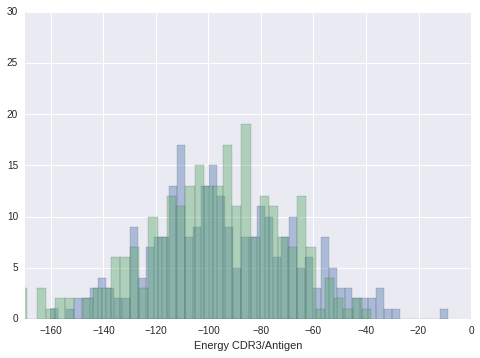

In [94]:
grouped_classified = vdjdb_classified.groupby('pdb_id')
rec_energy1 = [sum(grouped_classified.get_group(x).loc[(grouped_classified.get_group(x)['classification']) & \
              (grouped_classified.get_group(x)['tcr_v_allele'] == 'beta'), 'miyazava_energy']) \
              for x in grouped_classified.groups.keys()]
sns.distplot(rec_energy1, bins=50, kde=False)


grouped_mixed_classified = vdjdb_mixed_classified.groupby('pdb_id')
rec_energy2 = [sum(grouped_mixed_classified.get_group(x).loc[(grouped_mixed_classified.get_group(x)['classification']) & \
              (grouped_mixed_classified.get_group(x)['tcr_v_allele'] == 'beta'), 'miyazava_energy']) \
              for x in grouped_mixed_classified.groups.keys()]
sns.distplot(rec_energy2, bins=50, kde=False)
plt.axis([-170, 0, 0, 30])
plt.xlabel('Energy CDR3/Antigen')